# BEDU-Fase2: Proyecto de módulo 2 | Análisis de datos con Python

Nosotros somos el **equipo 5** y nuestro proyecto consiste en el análisis de *la relación existente entre la inversión el ciencia y el crecimiento económico de un país*. Para elo, usaremos como variables el porcentaje del PIB dedicado al rubro de *I+D* y el crecimiento porcental de la economia del pais en el mismo periodo de tiempo.

Este notebook contiene el código necesario para llevar a cabo este análisis de datos, el cual está asociado con el proyecto del módulo dos de la segunda fase del curso *Data science para profesionistas* ofertado por *Santander-BEDU*.

A lo largo de este módulo, aprendimos una amplia serie de herramientas para el análisis de datos. Nuestros aprendizajes en cada sesión fueron sobre:



> Sesión 1: Fundamentos de Python (Asignación, tipos de datos, etc.).

> Sesión 2: Estructra de datos y funciones (listas, diccionarios, funciones, etc.).

> Sesión 3: Programación funcional (map, filter, lambda, etc.).

> Sesión 4: Pandas y análisis exploratorio (manejo e indexación de `"Series"` y `"DataFrame"`).

> Sesión 5: Funciones vectorizadas y limpieza de datos (agregaciones, valores nulos, etc.).

> Sesión 6: APIs, concatenación.

> Sesión 7: Transformación, filtración y ordenamiento de datos.

> Sesión 8: Bases de datos, merge y agrupaciones.

En este proyecto hecimos uso de prácticamente todas las herramientas aquí aprendidas, con excepción del uso de APIs, definición funciones y la conexión a bases de datos. En vez de organizar nuestro análisis en función de cada sesión del curso, al inicio de cada sección de este notebook mencionaremos las sesiones del curso cuyas heramientas fueron usadas. También es importante señalar que se usaron herramientas no vistas en clase, pero que en su momento fueron requeridas para resolver los problemas presentados.

**Nota:** La lectura de las bases de datos se hace actualmente desde el Drive personal. Los datasets se encuentran disponibles en el repositorio:

[Datos Originales](https://github.com/MiguelSP8/BEDU_Proyecto_Modulo_Python/tree/main/Datos_originales)

Para el correcto funcionamiento de este notebok es necesario actualizar el path de las bases de datos.






## 1 ) Librerías

**Sesiones: 1, 4**

Para poder desarrollar este análisis, comenzaremos con importar las librerias de *Pandas* y *NumPy*, las cuales nos proporcionaran las herramientas necesarias para este estudio.

In [ ]:
import pandas as pd
import numpy as np

## 2 ) Lectura de bases de datos y análisis exploratorio

**Sesiones: 1, 2, 4**

**2.1 ) API_GB.XPD.RSDV.GD.ZS_DS2_es_csv_v2_4792337.csv**

Dataset sobre inversión en ciencia como porcentaje del GDP. Es un archivo CSV, usaremos la función `read_csv()` de pandas para cargar esta base de datos.

In [ ]:
df_inversion=pd.read_csv("/content/drive/MyDrive/proyecto_python_ciencia_economia/API_GB.XPD.RSDV.GD.ZS_DS2_es_csv_v2_4792337.csv",header=2,sep=",")

Vamos a obtener información respecto al tamaño de nuestro DataFrame:

In [ ]:
print(df_inversion.shape)

(266, 67)


Podemos ver que tenemos datos de 266 registros, y un total de 67 columnas. Usando el método `head()`, podemos analizar el contenido de las primeras filas del DataFrame. Podemos ver que las primeras 4 columnas contienen información descriptiva de la base de datos (`"Country Name"`, `"Country Code"`, `"Indicator Name"` y `"Indicator Code"`), el resto de las columnas parecen contener información respecto al porcentaje del PIB invertido en *I+D*, con excepción de la última columna, la cual parece ser una columna sin datos. También se alcanza a percibir que tenemos muchos datos faltantes, pero ya lidiaremos con ello más adelante.

In [ ]:
df_inversion.head()
#print(df_inversion.head())

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,Gasto en investigación y desarrollo (% del PIB),GB.XPD.RSDV.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,AFE,Gasto en investigación y desarrollo (% del PIB),GB.XPD.RSDV.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afganistán,AFG,Gasto en investigación y desarrollo (% del PIB),GB.XPD.RSDV.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,AFW,Gasto en investigación y desarrollo (% del PIB),GB.XPD.RSDV.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Gasto en investigación y desarrollo (% del PIB),GB.XPD.RSDV.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.03229,NaN,NaN,NaN,NaN,NaN,NaN


También es importante revisar que el tipo de datos sea el adecuado, para esto usaremos el método `dtypes`.

In [ ]:
print(df_inversion.dtypes,"\n")
print("type(df):",type(df_inversion))

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2018              float64
2019              float64
2020              float64
2021              float64
Unnamed: 66       float64
Length: 67, dtype: object 

type(df): <class 'pandas.core.frame.DataFrame'>


Como era de esperarse, las columnas con información descritiva (*strings*), son identificadas con datos tipo *object* y los registros numéricos como datos tipo *float*.



**2.2 ) Metadata_Country_API_GB.XPD.RSDV.GD.ZS_DS2_es_csv_v2_4792337.csv**

Dataset con la clasificación de los países de acuerdo a sus ingresos y a la región geográfica a la que pertenecen. También es un archivo CSV, por tanto, usaremos la miasma función `read_csv()` de pandas para cargar esta base de datos.

In [ ]:
df_clasificacion=pd.read_csv("/content/drive/MyDrive/proyecto_python_ciencia_economia/Metadata_Country_API_GB.XPD.RSDV.GD.ZS_DS2_es_csv_v2_4792337.csv",header=0,sep=",")

Vamos a obtener información respecto al tamaño de nuestro DataFrame:

In [ ]:
print(df_clasificacion.shape)

(266, 5)


En acuerdo con el DataFrame anterior, tenemos datos de 266 registros. En este caso, solo tenemos 5 columnas. Usando el método `head()`, podemos analizar el contenido de las primeras filas del `DataFrame`. Podemos ver que tenemos información respecto al `"Country Name"`, `"Country Code"`, `"Region"` e `"Income Group"`. La última columna parece no contener datos. También se alcanza a percibir que tenemos muchos datos faltantes, pero ya lidiaremos con ello más adelante.

In [ ]:
df_clasificacion.head()
#print(df_clasificacion.head())

,Country Name,Country Code,Region,Income_Group,Unnamed: 4
0,Aruba,ABW,NaN,Ingreso alto,NaN
1,NaN,AFE,NaN,Agregados,NaN
2,Afganistán,AFG,Asia meridional,Países de ingreso bajo,NaN
3,NaN,AFW,NaN,Agregados,NaN
4,Angola,AGO,África al sur del Sahara (excluido altos ingre...,Países de ingreso mediano bajo,NaN


También es importante revisar que el tipo de datos sea el adecuado, para esto usaremos el método `dtypes`.

In [ ]:
print(df_clasificacion.dtypes,"\n")
print("type(df):",type(df_inversion))

Country Name     object
Country Code     object
Region           object
Income_Group     object
Unnamed: 4      float64
dtype: object 

type(df): <class 'pandas.core.frame.DataFrame'>


Los tipos de datos asociados con cada columna son los esperados.

**2.3 ) 4.1_Growth_of_Gross_Domestic_Product.xls**

Dataset con el promedio de la razón de crecimiento del PIB de cada país en los periódos 2000-2010 y 2010-2020, entre otros datos. Este es un archivo xls, para cargar la base de datos usaremos la función `read_excel()` de pandas. Para ello primero necesitamos instalar la paqueteria `openpyxl`.

In [ ]:
pip install pandas openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Marcará error, a pesar de sugerencias de StackOverflow
import openpyxl# Comentaremos el siguiente comentario para evitar problemas al usar run all
#df_economia=pd.read_excel("/content/drive/MyDrive/proyecto_python_ciencia_economia/4.1_Growth_of_Gross_Domestic_Product.xls", engine="openpyxl")

Por alguna razón, no nos permite leer el archivo. Una alternativa es convertir la base de datos de *xls* a *csv* y usar la misma instrucción que antes:

In [ ]:
df_economia=pd.read_csv("/content/drive/MyDrive/proyecto_python_ciencia_economia/Growth_of_Gross_Domestic_Product.csv", header=[3],sep=",")

Revisamos el tamaño y tipo de datos del DataFrame.

In [ ]:
print(df_economia.shape)

(296, 11)


In [ ]:
print(df_economia.dtypes,"\n")
print("type(df):",type(df_economia))

Unnamed: 0     object
2000-2010      object
2010-2020      object
2000-2010.1    object
2010-2020.1    object
2000-2010.2    object
2010-2020.2    object
2000-2010.3    object
2010-2020.3    object
2000-2010.4    object
2010-2020.4    object
dtype: object 

type(df): <class 'pandas.core.frame.DataFrame'>


De lo anterior podemos observar un par de cosas:

* Hay más elementos que en los `DataFrame` anteriores
* Los tipos de datos son incorrectos

Se deben analizar los primeros y últimos datos del `DataFrame` para ver si nos dice algo al respecto. Esto lo haremos usando las funciones `head()` y `tail()`, respectivamente.

In [ ]:
df_economia.head()

,Unnamed: 0,2000-2010,2010-2020,2000-2010.1,2010-2020.1,2000-2010.2,2010-2020.2,2000-2010.3,2010-2020.3,2000-2010.4,2010-2020.4
0,Afghanistan,9.5,3.2,2.6,2.9,10.1,4.8,3.7,5.7,12.9,3.2
1,Albania,5.6,2.2,3.5,1.8,7.4,1.1,8.7,4.9,5.2,3.2
2,Algeria,3.9,2.3,6.3,4.1,0.9,-1,0.8,-1.3,6.8,4.1
3,American Samoa,-1.2,-0.7,..,..,..,..,-2.4,0.7,..,..
4,Andorra,3.1,0,..,..,..,..,..,..,..,..


In [ ]:
df_economia.tail()

,Unnamed: 0,2000-2010,2010-2020,2000-2010.1,2010-2020.1,2000-2010.2,2010-2020.2,2000-2010.3,2010-2020.3,2000-2010.4,2010-2020.4
291,Source,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
293,"World Bank national accounts data, and OECD Na...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295,Please see the online table at http://wdi.worl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


De lo anterior, podemos ver que las anomalias con este dataset persisten. Esto se debe a que a diferencia de los anteriores set de datos, en este se están leyendo los comentarios adicionales al final del DataFrame. Hay que delimitar el número de filas por leer, usando el agumento *nrows* de la función `read_csv()` de pandas.

In [ ]:
df_economia=pd.read_csv("/content/drive/MyDrive/proyecto_python_ciencia_economia/Growth_of_Gross_Domestic_Product.csv", header=[3],sep=",",nrows=226)

In [ ]:
df_economia.head()

,Unnamed: 0,2000-2010,2010-2020,2000-2010.1,2010-2020.1,2000-2010.2,2010-2020.2,2000-2010.3,2010-2020.3,2000-2010.4,2010-2020.4
0,Afghanistan,9.5,3.2,2.6,2.9,10.1,4.8,3.7,5.7,12.9,3.2
1,Albania,5.6,2.2,3.5,1.8,7.4,1.1,8.7,4.9,5.2,3.2
2,Algeria,3.9,2.3,6.3,4.1,0.9,-1,0.8,-1.3,6.8,4.1
3,American Samoa,-1.2,-0.7,..,..,..,..,-2.4,0.7,..,..
4,Andorra,3.1,0,..,..,..,..,..,..,..,..


In [ ]:
df_economia.tail(15)

,Unnamed: 0,2000-2010,2010-2020,2000-2010.1,2010-2020.1,2000-2010.2,2010-2020.2,2000-2010.3,2010-2020.3,2000-2010.4,2010-2020.4
211,"Yemen, Rep.",4.1,-6.4,2.7,-4.4,1.9,-9.1,..,..,7.1,-4.4
212,Zambia,7.5,3.8,-1.7,-0.4,10.7,3.8,4.9,4.6,9.1,4.4
213,Zimbabwe,-5.5,3.1,-9.8,3.5,-4,0.9,-3.7,-0.2,0.1,4.1
214,World,3.2,2.7,2.9,2.9,3.1,2.9,2.4,2,3.2,2.7
215,East Asia & Pacific,5.5,4.6,3.5,3,6.3,4.8,..,..,5.2,4.7
216,Europe & Central Asia,2,1.5,1.4,1.6,1.3,1.4,1.5,2,2.4,1.6
217,Latin America & Caribbean,3.5,1.1,3,2.5,2.7,0,2.6,0,3.8,1.6
218,Middle East & North Africa,4.7,2.4,2.7,2.2,3.4,1.3,4.4,1.6,6.3,2.9
219,North America,2.1,2,0.6,4.1,0.9,2,1.9,1.6,2.2,2
220,South Asia,6.5,5.8,2.8,3.4,8,5.3,8.3,6.2,7.1,6.7


In [ ]:
print(df_economia.shape)

(226, 11)


Con las instrucciones anteriores, podemos ver que los últimos registros válidos corresponden al análisis por regiones y por ingresos. Quedando únicamente 214 registros asociados a países.

Verificaremos que el nuevo DataFrame tenga los tipos de datos correctos:

In [ ]:
print(df_economia.dtypes,"\n")
print("type(df):",type(df_economia))

Unnamed: 0     object
2000-2010      object
2010-2020      object
2000-2010.1    object
2010-2020.1    object
2000-2010.2    object
2010-2020.2    object
2000-2010.3    object
2010-2020.3    object
2000-2010.4    object
2010-2020.4    object
dtype: object 

type(df): <class 'pandas.core.frame.DataFrame'>


Todas nuestras columnas están identificadas como datos tipo *object*. Esto se debe a que los registros faltanes se llenaron con `".."`, en vez de `NaN`, a diferencia de los datasets anteriores, el los cuales se hacía de forma automática. El conocimiento de nuestra base de datos nos permite saber que laas columnas de "2000-2010" en adelante deberían ser datos numéricos. Necsitamos hacer la transformación al tipo de datos adecuados. Para ello usaremos la función `to_numeric()`, con el argumento `errors="corce"`, tal que los registros con datos no numéricos se transformen automáticamente en `NaN`. Para simplificar el proceso, crearemos una lista con los nombres de las columnas que requieren el cambio de tipos de datos.

Usaremos el método `columns` para extraer los nombres de las columnas, así como la función `list()` para transformar el arreglo de nombres de columnas en una lista. Posteriormente, usaremos la función `pop()` para eliminar el primer elemento de la lista, ya que no necesitamos reasignar el tipo de datos en ella.

In [ ]:
lista_economia=list(df_economia.columns)
lista_economia.pop(0)
lista_economia

['2000-2010',
 '2010-2020',
 '2000-2010.1',
 '2010-2020.1',
 '2000-2010.2',
 '2010-2020.2',
 '2000-2010.3',
 '2010-2020.3',
 '2000-2010.4',
 '2010-2020.4']

Una vez que tenemos esta lista, nos ayudaremos de un *for loop* para realizar el cambio de tipo de datos en cada columna de la lista.

In [ ]:
for i in lista_economia:
  df_economia[i]=pd.to_numeric(df_economia[i],errors="coerce")

Verificamos que el tipo de datos sea correcto. También realizamos una visualización de los primeros registros para ver que en efecto se tengan los registros con `NaN`.

In [ ]:
df_economia.dtypes

Unnamed: 0      object
2000-2010      float64
2010-2020      float64
2000-2010.1    float64
2010-2020.1    float64
2000-2010.2    float64
2010-2020.2    float64
2000-2010.3    float64
2010-2020.3    float64
2000-2010.4    float64
2010-2020.4    float64
dtype: object

In [ ]:
df_economia.head()

,Unnamed: 0,2000-2010,2010-2020,2000-2010.1,2010-2020.1,2000-2010.2,2010-2020.2,2000-2010.3,2010-2020.3,2000-2010.4,2010-2020.4
0,Afghanistan,9.5,3.2,2.6,2.9,10.1,4.8,3.7,5.7,12.9,3.2
1,Albania,5.6,2.2,3.5,1.8,7.4,1.1,8.7,4.9,5.2,3.2
2,Algeria,3.9,2.3,6.3,4.1,0.9,-1.0,0.8,-1.3,6.8,4.1
3,American Samoa,-1.2,-0.7,NaN,NaN,NaN,NaN,-2.4,0.7,NaN,NaN
4,Andorra,3.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**2.4 ) Observaciones al momento:**

* Ya se tienen los DataFrame con la información necesaria para nuestro análisis, cada uno de ellos con el tipo de datos correcto.
* Nos hemos percatado de que los DataFrames tienen dimensiones diferentes.
* Nuestra base de datos contiene pocos registros, sin embargo, por la naturaleza del tema, esto es normal.

Tomando lo anterior en consideración, lo suiguiente que harémos será crear DataFrames con la información que será relevante para nuestro estudio, en busca de eliminar aquellos registros y columnas que no poseen información relevante para nuestro estudio, teniendo en cuanta que en caso de alguno de ellos contenga valores `NaN`, al eliminarlos, pueden resultar en pérdida de información relevante.


#3 ) Organización y limpieza de datos
**Sesiones: 1, 2, 4, 5, 6, 7**

#### 3.1 ) `DataFrame` `df_economia_paises`

A partir del `DataFrame` `df_economia`, crearemos un nuevo DataFrame que contenga únicamente los registros asociados al incremento promedio en la economía de cada país en los periodos `"2000-2010"` y `"2010-2020"`, y renombramos los nombres de las columnas por otros más adecuados: `"nombre_pais"`, `"2001-2010"` y `"2011-2020"`. Para esto harémos uso de los métodos `.loc[]` y `rename()`, respectivamente.

In [ ]:
df_economia_paises=df_economia.loc[0:213,["Unnamed: 0","2000-2010","2010-2020"]]
nombres_nuevos={
    "Unnamed: 0":"nombre_pais",
    "2000-2010":"economia_2001_2010",
    "2010-2020":"economia_2011_2020"
}
df_economia_paises=df_economia_paises.rename(columns=nombres_nuevos)
df_economia_paises

,nombre_pais,economia_2001_2010,economia_2011_2020
0,Afghanistan,9.5,3.2
1,Albania,5.6,2.2
2,Algeria,3.9,2.3
3,American Samoa,-1.2,-0.7
4,Andorra,3.1,0.0
...,...,...,...
209,Virgin Islands (U.S.),1.5,-2.2
210,West Bank and Gaza,6.1,3.0
211,"Yemen, Rep.",4.1,-6.4
212,Zambia,7.5,3.8


Lo siguiente es eliminar los registros de paises que contengan datos no analizables o no numéricos. Primero verificaremos el tamaño de nuestro DataFrame, después buscaremos si existen registros con `NaN`.

In [ ]:
df_economia_paises.shape

(214, 3)

In [ ]:
df_economia_paises.isna().sum()

nombre_pais            0
economia_2001_2010    15
economia_2011_2020     8
dtype: int64

De los 214 registros, podemos ver que hay 15 países sin datos para el periodo `"2001-2010"` y 8 para el periodo `"2011-2020"`. Podríamos intentar conseguir los datos de otra fuente, pero por cuestiones de tiempo simplemente los eliminaremos, usando la función `dropna()` con el argumento `axis=0` para eliminar las filas asociadas con los países sin registros en algún periodo. Por último, realizaremos una reindexación mediante la función `reset_index()` de *Pandas*, con el argumento `drop=True` ya que no nos interesa conservar el índice original.

In [ ]:
df_economia_paises=df_economia_paises.dropna(axis=0).reset_index(drop=True)
print(df_economia_paises.shape)
df_economia_paises.tail()

(198, 3)


,nombre_pais,economia_2001_2010,economia_2011_2020
193,Virgin Islands (U.S.),1.5,-2.2
194,West Bank and Gaza,6.1,3.0
195,"Yemen, Rep.",4.1,-6.4
196,Zambia,7.5,3.8
197,Zimbabwe,-5.5,3.1


### 3.2 )`DataFrame` `df_economia_region`

A partir del `DataFrame` `df_economia` también podemos crear un nuevo `DataFrame` que contenga únicamente los registros asociados al incremento promedio en la economía de cada región geográfica en los periodos `"2000-2010"` y `"2010-2020"`. Así mismo, renombrarémos los nombres de las columnas por otros más adecuados: `"nombre_pais"`, `"2001-2010"` y `"2011-2020"`. Para esto harémos uso de los métodos `.loc[]` y `rename()`, respectivamente.

In [ ]:
df_economia_region=df_economia.loc[214:221,["Unnamed: 0","2000-2010","2010-2020"]]
nombres_nuevos={
    "Unnamed: 0":"nombre_pais",
    "2000-2010":"region_2001_2010",
    "2010-2020":"region_2011_2020"
}
df_economia_region=df_economia_region.rename(columns=nombres_nuevos)
df_economia_region

,nombre_pais,region_2001_2010,region_2011_2020
214,World,3.2,2.7
215,East Asia & Pacific,5.5,4.6
216,Europe & Central Asia,2.0,1.5
217,Latin America & Caribbean,3.5,1.1
218,Middle East & North Africa,4.7,2.4
219,North America,2.1,2.0
220,South Asia,6.5,5.8
221,Sub-Saharan Africa,5.5,2.9


En este caso no tenemos datos faltantes, pero si necesitamos reidexar los registros.

In [ ]:
df_economia_region=df_economia_region.reset_index(drop=True)
df_economia_region

,nombre_pais,region_2001_2010,region_2011_2020
0,World,3.2,2.7
1,East Asia & Pacific,5.5,4.6
2,Europe & Central Asia,2.0,1.5
3,Latin America & Caribbean,3.5,1.1
4,Middle East & North Africa,4.7,2.4
5,North America,2.1,2.0
6,South Asia,6.5,5.8
7,Sub-Saharan Africa,5.5,2.9


### 3.2 )`DataFrame` `df_economia_ingresos`

De igual forma, partiendo del `DataFrame` `df_economia` podemos crear uno nuevo que contenga únicamente los registros asociados al incremento promedio en la economía de los países dentro de un mismo rango de ingresos, en los periodos `"2000-2010"` y `"2010-2020"`. Así mismo, renombrarémos los nombres de las columnas siguiendo la nomenclatura de los casos anteriores: `"nombre_pais"`, `"2001-2010"` y `"2011-2020"`. Para esto harémos uso de los métodos `.loc[]` y `rename()`, respectivamente.

In [ ]:
df_economia_ingresos=df_economia.loc[222:,["Unnamed: 0","2000-2010","2010-2020"]]
nombres_nuevos={
    "Unnamed: 0":"nombre_pais",
    "2000-2010":"ingresos_2001_2010",
    "2010-2020":"ingresos_2011_2020"
}
df_economia_ingresos=df_economia_ingresos.rename(columns=nombres_nuevos)
df_economia_ingresos

,nombre_pais,ingresos_2001_2010,ingresos_2011_2020
222,Low income,5.6,1.9
223,Lower middle income,5.8,4.6
224,Upper middle income,7.0,4.7
225,High income,2.0,1.7


En este `DataFrame` tampoco hay datos faltantes, pero si se necesita reidexar los registros.

In [ ]:
df_economia_ingresos=df_economia_ingresos.reset_index(drop=True)
df_economia_ingresos

,nombre_pais,ingresos_2001_2010,ingresos_2011_2020
0,Low income,5.6,1.9
1,Lower middle income,5.8,4.6
2,Upper middle income,7.0,4.7
3,High income,2.0,1.7


### 3.4 ) `DataFrame` `df_clasificacion`

Ahora trabajaremos ocn el `df_clasificacion`. Primero seleccionaremos solo las columnas de interés. Luego renombrarémos los nombres de las columnas por otros más adecuados: `"nombre_pais"`, `"codigo_pais"`, `"region"`y `"grupo_ingresos"`. Para esto harémos uso del método `rename()`.

In [ ]:
df_clasificacion.head()

,Country Name,Country Code,Region,Income_Group,Unnamed: 4
0,Aruba,ABW,NaN,Ingreso alto,NaN
1,NaN,AFE,NaN,Agregados,NaN
2,Afganistán,AFG,Asia meridional,Países de ingreso bajo,NaN
3,NaN,AFW,NaN,Agregados,NaN
4,Angola,AGO,África al sur del Sahara (excluido altos ingre...,Países de ingreso mediano bajo,NaN


In [ ]:
df_clasificacion=df_clasificacion[["Country Name","Country Code","Region","Income_Group"]]
nombres_nuevos={
    "Country Name":"nombre_pais",
    "Country Code":"codigo_pais",
    "Region":"region",
    "Income_Group" : "grupo_ingresos"
}
df_clasificacion=df_clasificacion.rename(columns=nombres_nuevos)
df_clasificacion

,nombre_pais,codigo_pais,region,grupo_ingresos
0,Aruba,ABW,NaN,Ingreso alto
1,NaN,AFE,NaN,Agregados
2,Afganistán,AFG,Asia meridional,Países de ingreso bajo
3,NaN,AFW,NaN,Agregados
4,Angola,AGO,África al sur del Sahara (excluido altos ingre...,Países de ingreso mediano bajo
...,...,...,...,...
261,Kosovo,XKX,Europa y Asia central (excluido altos ingresos),Ingreso mediano alto
262,"Yemen, Rep. del",YEM,Oriente Medio y Norte de África (excluido alto...,Países de ingreso bajo
263,Sudáfrica,ZAF,África al sur del Sahara (excluido altos ingre...,Ingreso mediano alto
264,Zambia,ZMB,África al sur del Sahara (excluido altos ingre...,Países de ingreso bajo


Lo siguiente es eliminar los registros de paises que contengan datos no analizables. Primero verificaremos el tamaño de nuestro DataFrame, después buscaremos si existen registros con `NaN`.

In [ ]:
df_clasificacion.shape

(266, 4)

In [ ]:
df_clasificacion.isna().sum()

nombre_pais         2
codigo_pais         0
region            130
grupo_ingresos      0
dtype: int64

De los 266 registros, podemos ver que hay 130 sin datos respeecto a la región geográfica a la que pertenecen y dos sin nombre del país. Podríamos intentar extraer la información sobre la región geográfica de otra fuente, sin embargo, por ahora nos quedarémos únicamente con los registros que si la tienen registrada. Esto lo haremos usando la función `dropna()` con el argumento `axis=0` para eliminar las filas asociadas con los países sin registro de región geográfica o nombre. Por último, realizaremos una reindexación mediante la función `reset_index()` de *Pandas*, con el argumento `drop=True` ya que no nos interesa conservar el índice original.

In [ ]:
df_clasificacion=df_clasificacion.dropna(axis=0).reset_index(drop=True)
print(df_clasificacion.shape)
df_clasificacion.tail()

(136, 4)


,nombre_pais,codigo_pais,region,grupo_ingresos
131,Kosovo,XKX,Europa y Asia central (excluido altos ingresos),Ingreso mediano alto
132,"Yemen, Rep. del",YEM,Oriente Medio y Norte de África (excluido alto...,Países de ingreso bajo
133,Sudáfrica,ZAF,África al sur del Sahara (excluido altos ingre...,Ingreso mediano alto
134,Zambia,ZMB,África al sur del Sahara (excluido altos ingre...,Países de ingreso bajo
135,Zimbabwe,ZWE,África al sur del Sahara (excluido altos ingre...,Países de ingreso mediano bajo


Podemos ver que los registros de este `DataFrame` no coinciden del todo, a nivel nomenclatura con los registros en los `DataFrame`previos. Usando el método `unique()` veremos los diferentes registros que se tienen en cada columna. Luego, mediante las funciones `str.replace()` y `str.strip()` vamos a homogeneizar la notación con los `DataFrame` anteriores.

In [ ]:
registros_region=df_clasificacion["region"].unique()
registros_region

array(['Asia meridional',
       'África al sur del Sahara (excluido altos ingresos)',
       'Europa y Asia central (excluido altos ingresos)',
       'América Latina y el Caribe (excluido altos ingresos)',
       'Asia oriental y el Pacífico (excluido altos ingresos)',
       'Oriente Medio y Norte de África (excluido altos ingresos)'],
      dtype=object)

In [ ]:
df_clasificacion["region"]=df_clasificacion["region"].str.replace("excluido altos ingresos"," ")
df_clasificacion["region"]=df_clasificacion["region"].str.replace(")"," ")
df_clasificacion["region"]=df_clasificacion["region"].str.replace(")"," ")
df_clasificacion["region"]=df_clasificacion["region"].str.strip()
df_clasificacion["region"]=df_clasificacion["region"].str.replace("Asia meridional","South Asia")
df_clasificacion["region"]=df_clasificacion["region"].str.replace("África al sur del Sahara","Sub-Saharan Africa")
df_clasificacion["region"]=df_clasificacion["region"].str.replace("América Latina y el Caribe","Latin America & Caribbean")
df_clasificacion["region"]=df_clasificacion["region"].str.replace("Europa y Asia central","Europe & Central Asia")
df_clasificacion["region"]=df_clasificacion["region"].str.replace('Asia oriental y el Pacífico',"East Asia & Pacific")
df_clasificacion["region"]=df_clasificacion["region"].str.replace('Oriente Medio y Norte de África',"Middle East & North Africa")


<ipython-input-121-f1909ceb3d5c>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_clasificacion["region"]=df_clasificacion["region"].str.replace(")"," ")
<ipython-input-121-f1909ceb3d5c>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_clasificacion["region"]=df_clasificacion["region"].str.replace(")"," ")


In [ ]:
registros_ingresos=df_clasificacion["grupo_ingresos"].unique()
registros_ingresos

array(['Países de ingreso bajo', 'Países de ingreso mediano bajo',
       'Ingreso mediano alto'], dtype=object)

In [ ]:
df_clasificacion["grupo_ingresos"]=df_clasificacion["region"].str.replace("Países de ingreso bajo","Low income")
df_clasificacion["grupo_ingresos"]=df_clasificacion["region"].str.replace("Países de ingreso mediano bajo","Lower middle income")
df_clasificacion["grupo_ingresos"]=df_clasificacion["region"].str.replace("Ingreso mediano alto","Upper middle income")


In [ ]:
df_clasificacion.head()
print(df_clasificacion.shape)

(136, 4)


Podemos notar que en esta base de datos no se tienen registros de América del norte. De forma similar, podemos ver que tampoco hay registros de países con ingresos *altos*. Mientras que en los `DataFrame` `df_economia_region` y `df_economia_ingresos` si tenemos información al respecto. Hay que ser cuidadosos con el uso de este conjunto de datos.

### 3.5 ) `df_inversion`

Ahora trabajaremos con el `df_inversion`. Usando este `DatFrame` como base, construiremos uno nuevo que contenga las columnas: `"nombre_pais"`, `"codigo_pais"`, `"2001-2010"`y `"2011-2020"`. Las primeras dos columnas serán una copia de las primeras dos columnas de `df_inversion`, las últimas dos, se generaran mediante el cálculo del promedio de la inversión en ciencia de cada país en los periodos `"2001-2010"` y `"2011-2020"`.

In [ ]:
df_inversion.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,Gasto en investigación y desarrollo (% del PIB),GB.XPD.RSDV.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,AFE,Gasto en investigación y desarrollo (% del PIB),GB.XPD.RSDV.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afganistán,AFG,Gasto en investigación y desarrollo (% del PIB),GB.XPD.RSDV.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,AFW,Gasto en investigación y desarrollo (% del PIB),GB.XPD.RSDV.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Gasto en investigación y desarrollo (% del PIB),GB.XPD.RSDV.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.03229,NaN,NaN,NaN,NaN,NaN,NaN


Lo que nosotros necesitamos es calcular el promedio del incremento en la inversión en ciencia y tecnología en cada periodo. Para ello usaremos las columnas `"2000"` a `"2020"` de `df_inversion`. Para poder hacer los calculos necesitamos que nuestros registros estén completos, es decir, eliminar los registros con `NaN` en alguno de los años de interés. Podemos proceder de dos maneras:

* Eliminar las columnas que no nos interesan, usando el método `drop(columns=[])`.
* Crear un nuevo `DataFrame` con las columnas que si nos interesan y posteriormente eliminar reegistros incompletos.

De las 66 columnas que tiene el `DataFrame` original solo nos interesan la primera y un conjunto de la region media, por ello crearemos `df_inversion_periodo` unicamente con la primer columna, y luego lo modificaremos, concatenandolo con el resto de las columnas de interés.

In [ ]:
df_inversion_periodo=pd.DataFrame()
df_inversion_periodo["nombre_pais"]=df_inversion["Country Name"]
df_inversion_periodo["codigo_pais"]=df_inversion["Country Code"]
df_inversion_periodo=pd.concat([df_inversion_periodo,df_inversion.loc[:,"2000":"2020"]],axis=1)
df_inversion_periodo=df_inversion_periodo.dropna(axis=0)
df_inversion_periodo
df_inversion_periodo.reset_index(drop=True)

,nombre_pais,codigo_pais,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Armenia,ARM,0.191060,0.279870,0.252550,0.321090,0.256590,0.257610,0.240570,0.211070,...,0.270140,0.238530,0.222160,0.241510,0.250020,0.233050,0.227880,0.188760,0.178540,0.209210
1,Austria,AUT,1.886020,1.992100,2.065980,2.174560,2.166120,2.373240,2.359230,2.418430,...,2.668680,2.914720,2.954920,3.084290,3.049690,3.116550,3.056560,3.090580,3.129720,3.201280
2,Azerbaiyán,AZE,0.336000,0.340010,0.301550,0.324960,0.298310,0.219940,0.171650,0.170060,...,0.210840,0.214270,0.209690,0.209780,0.222320,0.206370,0.184680,0.184160,0.200130,0.224350
3,Bélgica,BEL,1.936190,2.032790,1.903250,1.841190,1.820500,1.790610,1.822690,1.849990,...,2.173320,2.281140,2.330730,2.370020,2.428170,2.523380,2.666660,2.860310,3.160000,3.477200
4,Bulgaria,BGR,0.495170,0.447090,0.464730,0.472220,0.470860,0.442690,0.442160,0.430300,...,0.529510,0.600360,0.634330,0.790050,0.949170,0.769760,0.739950,0.753790,0.832370,0.853510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Ucrania,UKR,0.929040,0.989440,0.962690,1.071660,1.043920,0.995180,0.914030,0.818690,...,0.710900,0.723630,0.733000,0.650340,0.614770,0.483390,0.448790,0.471130,0.433840,0.406080
62,Ingreso mediano alto,UMC,0.684406,0.717542,0.778089,0.820228,0.847500,0.902630,0.922371,0.972018,...,1.217944,1.333622,1.388858,1.434070,1.538771,1.575104,1.569433,1.607461,1.700438,1.995648
63,Estados Unidos,USA,2.628790,2.648300,2.559260,2.564550,2.502430,2.516970,2.557640,2.631610,...,2.765250,2.681660,2.711540,2.721510,2.782060,2.845850,2.895720,3.000820,3.166090,3.450180
64,Uzbekistán,UZB,0.360630,0.345440,0.293560,0.268250,0.270410,0.237410,0.223950,0.217210,...,0.148770,0.155120,0.155000,0.153350,0.164970,0.172380,0.148340,0.124500,0.113770,0.139180


Ahora que ya tenemos un conjunto de datos sobre los cuales trabajar, crearemos el `df_incrementos`. El incremento anual en la inversión en ciencia y tecnología lo vamos a calcular como la diferencia entre un año y el año previo. 

In [ ]:
df_incrementos=pd.DataFrame()
df_incrementos["nombre_pais"]=df_inversion_periodo["nombre_pais"]
df_incrementos["codigo_pais"]=df_inversion_periodo["codigo_pais"]
lista_columnas=list(df_inversion_periodo.columns[2:])
for i in range(0,len(lista_columnas)-1):
  df_incrementos[lista_columnas[i+1]]=df_inversion_periodo[lista_columnas[i+1]]-df_inversion_periodo[lista_columnas[i]]



In [ ]:
df_incrementos=df_incrementos.copy()
df_incrementos.reset_index(drop=True)

,nombre_pais,codigo_pais,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Armenia,ARM,0.088810,-0.027320,0.068540,-0.064500,0.001020,-0.017040,-0.029500,0.013310,...,0.028750,-0.031610,-0.016370,0.019350,0.008510,-0.016970,-0.005170,-0.039120,-0.010220,0.030670
1,Austria,AUT,0.106080,0.073880,0.108580,-0.008440,0.207120,-0.014010,0.059200,0.151020,...,-0.057420,0.246040,0.040200,0.129370,-0.034600,0.066860,-0.059990,0.034020,0.039140,0.071560
2,Azerbaiyán,AZE,0.004010,-0.038460,0.023410,-0.026650,-0.078370,-0.048290,-0.001590,-0.004520,...,-0.007640,0.003430,-0.004580,0.000090,0.012540,-0.015950,-0.021690,-0.000520,0.015970,0.024220
3,Bélgica,BEL,0.096600,-0.129540,-0.062060,-0.020690,-0.029890,0.032080,0.027300,0.086850,...,0.111440,0.107820,0.049590,0.039290,0.058150,0.095210,0.143280,0.193650,0.299690,0.317200
4,Bulgaria,BGR,-0.048080,0.017640,0.007490,-0.001360,-0.028170,-0.000530,-0.011860,0.017360,...,-0.033560,0.070850,0.033970,0.155720,0.159120,-0.179410,-0.029810,0.013840,0.078580,0.021140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Ucrania,UKR,0.060400,-0.026750,0.108970,-0.027740,-0.048740,-0.081150,-0.095340,-0.008780,...,-0.091890,0.012730,0.009370,-0.082660,-0.035570,-0.131380,-0.034600,0.022340,-0.037290,-0.027760
62,Ingreso mediano alto,UMC,0.033136,0.060546,0.042140,0.027272,0.055130,0.019741,0.049647,0.044108,...,-0.010597,0.115678,0.055236,0.045211,0.104701,0.036333,-0.005671,0.038027,0.092977,0.295210
63,Estados Unidos,USA,0.019510,-0.089040,0.005290,-0.062120,0.014540,0.040670,0.073970,0.136300,...,0.029850,-0.083590,0.029880,0.009970,0.060550,0.063790,0.049870,0.105100,0.165270,0.284090
64,Uzbekistán,UZB,-0.015190,-0.051880,-0.025310,0.002160,-0.033000,-0.013460,-0.006740,-0.023670,...,-0.005530,0.006350,-0.000120,-0.001650,0.011620,0.007410,-0.024040,-0.023840,-0.010730,0.025410


In [ ]:
print(f"Hay {df_incrementos.shape[0]} países con registros completos en el periodo 2001-2020")

Hay 66 países con registros completos en el periodo 2001-2020


Comenzamos a crear nuestro nuevo `DataFrame`

In [ ]:
df_inversion_res=pd.DataFrame()
df_inversion_res["nombre_pais"]=df_incrementos["nombre_pais"]
df_inversion_res["codigo_pais"]=df_incrementos["codigo_pais"]

Vamos a agregar una nueva columna que contendrá el promedio del incremento en la inversion en ciencia y tecnología de cada periodo.

In [ ]:
df_inversion_res["inversion_2001_2010"]=df_incrementos.loc[:,"2001":"2010"].mean(axis=1)
df_inversion_res["inversion_2011_2020"]=df_incrementos.loc[:,"2011":"2020"].mean(axis=1)
df_inversion_res.reset_index(drop=True)

,nombre_pais,codigo_pais,inversion_2001_2010,inversion_2011_2020
0,Armenia,ARM,0.005033,-0.003218
1,Austria,AUT,0.084008,0.047518
2,Azerbaiyán,AZE,-0.011752,0.000587
3,Bélgica,BEL,0.012569,0.141532
4,Bulgaria,BGR,0.006790,0.029044
...,...,...,...,...
61,Ucrania,UKR,-0.012625,-0.039671
62,Ingreso mediano alto,UMC,0.054413,0.076711
63,Estados Unidos,USA,0.010661,0.071478
64,Uzbekistán,UZB,-0.020633,-0.001512


### 3.6 ) Observaciones al momento:

* Ya se tienen los `DataFrame` con los datos limpios y ordenados según nuestros intereses.
* La cantidad de registros completos en cada `DataFrame` es diferente al del resto.

En este momento, los `DataFrame` que contienen información relevante, ordenada y limpia, son los siguientes:
1. `df_economia_paises`: incremento porcentual promedio en la economía de cada país en los periodos `"2001-2010"` y `"2011-2020"`. 
2. `"df_economia_region"`: incremento porcentual  promedio de la economía por regiones en los periodos `"2001-2010"` y `"2011-2020"`.
3. `"df_economia_ingresos"`: incremento porcentual promedio en la economía conforme al grupo de ingresos económicos al que pertenece cada cada país, en los periodos `"2001-2010"` y `"2011-2020"`.
4. `"df_clasificacion"`: clasificacion de los países de acuerdo a sus ingresos y a la región geográfica a la que perenecen, excluyendo a los países con ingresos económicos altos.
5. `"df_inversión_res"`: incremento en la inversión en ciencia y tecnología de cada pais en los periodos `"2001-2010"` y `"2011-2020"`. La inversión en *I+D* está estimada como un porcentaje del GDP.

#4 ) `Merge` de los `DataFrame` para crear el `df_inversion_vs_economia`
**Sesones: 1, 2, 4, 5, 8**


Tomando lo anterior en consideración, lo suiguiente que harémos será crear un nuevo `DataFrame` que reuna toda la información relevante para nuestro estudio: el incremento en la inversión en ciencia y tecnología, y el incremento en la economía, medido mediente el GDP. Para hacer esto, usaremos la función `merge`, buscando ligar los diferentes `DataFrame` usando el nombre de los países como llave.

Haremos un `left join`, entre los `DataFrame` `df_inversion_res` y `df_economia_paises`, usando la columna `nombre_pais` como llave para ambos conjuntos de datos. 

In [ ]:
df_inversion_vs_economia=pd.merge(df_inversion_res,df_economia_paises,left_on="nombre_pais",right_on="nombre_pais")
df_inversion_vs_economia

,nombre_pais,codigo_pais,inversion_2001_2010,inversion_2011_2020,economia_2001_2010,economia_2011_2020
0,Armenia,ARM,0.005033,-0.003218,9.2,3.8
1,Austria,AUT,0.084008,0.047518,1.8,1.0
2,Bulgaria,BGR,0.006790,0.029044,5.2,1.9
3,China,CHN,0.082056,0.068721,10.9,7.0
4,Colombia,COL,0.006252,0.009454,4.5,2.8
5,Cuba,CUB,0.012902,-0.008929,6.1,1.4
6,Estonia,EST,0.097899,0.021348,4.2,3.2
7,Israel,ISR,-0.000558,0.151126,3.6,3.6
8,Kuwait,KWT,-0.002402,0.008521,6.1,0.8
9,Mongolia,MNG,0.005681,-0.011137,7.2,6.3


Tenemos un problema, solo tenemos 12 egistros con coincidencia. Por interés particular, sabemos que México estaba en ambos registros. Lo que está pasando es que la base de datos sobre el crecimiento de la economia se encuentra en inglés, hay varios nombres que con la traducción cambian.

Para mejorar esto, vamos a usar la librería `"country-conveter"`, a través de ella vamos a extraer los `"codigo_pais"` de los registros del `DataFrame` `"df_economia_paises"`, usando los nombres como input. Así, en vez de hacer el `"merge"` usando los nombres, lo harémos usando los códigos. 

In [ ]:
pip install country-converter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import country_converter as coco

In [ ]:
lista_nombres=list(df_economia_paises["nombre_pais"])
df_economia_paises["codigo_pais"]=pd.Series(coco.convert(names = lista_nombres, src ="regex" , to = 'ISO3'),index=df_economia_paises.index)
df_economia_paises.head()

,nombre_pais,economia_2001_2010,economia_2011_2020,codigo_pais
0,Afghanistan,9.5,3.2,AFG
1,Albania,5.6,2.2,ALB
2,Algeria,3.9,2.3,DZA
3,American Samoa,-1.2,-0.7,ASM
4,Andorra,3.1,0.0,AND


Ahora que ya tenemos la columna `"codigo_pais"`, intentaremos hacer nuevamente el `"merge"`, pero antes, nos aseguraremos de que no haber introducido registros con datos faltantes.

In [ ]:
print(df_economia_paises.shape)
df_economia_paises.isna().sum()

(198, 4)


nombre_pais           0
economia_2001_2010    0
economia_2011_2020    0
codigo_pais           0
dtype: int64

Todo se ve en orden, entonces:

In [ ]:
df_inversion_vs_economia=pd.merge(df_inversion_res,df_economia_paises,left_on="codigo_pais",right_on="codigo_pais")
print(df_inversion_vs_economia.shape)
df_inversion_vs_economia.head()

(46, 7)


,nombre_pais_x,codigo_pais,inversion_2001_2010,inversion_2011_2020,nombre_pais_y,economia_2001_2010,economia_2011_2020
0,Armenia,ARM,0.005033,-0.003218,Armenia,9.2,3.8
1,Austria,AUT,0.084008,0.047518,Austria,1.8,1.0
2,Azerbaiyán,AZE,-0.011752,0.000587,Azerbaijan,17.0,1.1
3,Bélgica,BEL,0.012569,0.141532,Belgium,1.9,1.1
4,Bulgaria,BGR,0.006790,0.029044,Bulgaria,5.2,1.9


Podemos corroborar que la asignación de nombres es correcta. También se puede apreciar que se lograron recuperar la mayoria de los registros. Otra cosa que podemos hacer es eliminar la columna `"nombre_pais"` en el `DataFrame` de la derecha, para evitar tener repetida esa información, y con ello, que se renombre ambas columnas.

In [ ]:
df_economia_paises=df_economia_paises.drop(columns=["nombre_pais"])

Así, ahora estamos seguros de que el `DataFraame` que obtendremos después del `"merge"` es el adecuado.

In [ ]:
df_inversion_vs_economia=pd.merge(df_inversion_res,df_economia_paises,left_on="codigo_pais",right_on="codigo_pais")
print(df_inversion_vs_economia.shape)
df_inversion_vs_economia.head()

(46, 6)


,nombre_pais,codigo_pais,inversion_2001_2010,inversion_2011_2020,economia_2001_2010,economia_2011_2020
0,Armenia,ARM,0.005033,-0.003218,9.2,3.8
1,Austria,AUT,0.084008,0.047518,1.8,1.0
2,Azerbaiyán,AZE,-0.011752,0.000587,17.0,1.1
3,Bélgica,BEL,0.012569,0.141532,1.9,1.1
4,Bulgaria,BGR,0.006790,0.029044,5.2,1.9


# 5 ) Análisis de datos orientado a contestar preguntas
**Sesiones: 1, 2, 4, 6, 7**

Para realizar nuestro análisis nos basaremos en los `DataFrame`:

* `"df_inversion_vs_economia"`: contiene información sobre la inversion promedio en *I+D* y el crecimineto promedio de la economia de cada país en los periodos `"2001-2010"` y `"2011-2020"`. 
* `"df_economia_region"`: contiene información sobre y el crecimineto promedio de la economia de cada región en los periodos `"2001-2010"` y `"2011-2020"`. 
* `"df_economia_ingresos"` : contiene información sobre el crecimineto promedio de la economia de cada grupo, clasificados con base a sus ingresos, en los periodos `"2001-2010"` y `"2011-2020"`. 

Las preguntas que nos planteamos respecto a este tema son las siguientes:

### 1) ¿Cuáles son los países que más invierten en ciencia?

Para responder a esta pregunta, usaremos la funcion `"df.sort_values()"` para ordenar nuestros datos respecto a la columna `"inversion_2001_2010"` y posteriormente respecto a la columna `"inversion_2011_2020"`, usando el argumento `"ascending=False"`, en busca de ordenar nuestros datos de forma descendiente, guardando nuestros datos en nuevos `DataFrame`.



In [ ]:
df_paises_sort_by_inversion_1=df_inversion_vs_economia.sort_values('inversion_2001_2010', ascending=False)
df_paises_sort_by_inversion_2=df_inversion_vs_economia.sort_values('inversion_2011_2020', ascending=False)

Así pues, los 10 países que en promedio invirtieron mayor porcentaje de su PIB en ciencia en el periodo `"2001-2010"` son:

In [ ]:
df_mas_1=df_paises_sort_by_inversion_1[["nombre_pais","inversion_2001_2010"]].head(10).reset_index(drop=True)
df_mas_1

,nombre_pais,inversion_2001_2010
0,"Corea, República de",0.119059
1,Estonia,0.097899
2,Austria,0.084008
3,China,0.082056
4,Portugal,0.081373
5,Dinamarca,0.073087
6,Eslovenia,0.069151
7,Irlanda,0.051121
8,España,0.047720
9,Finlandia,0.046394


Similarmente, los 10 países que en promedio invirtieron mayor porcentaje de su PIB en ciencia en el periodo `"2011-2020"` son:

In [ ]:
df_mas_2=df_paises_sort_by_inversion_2[["nombre_pais","inversion_2011_2020"]].head(10).reset_index(drop=True)
df_mas_2

,nombre_pais,inversion_2011_2020
0,Israel,0.151126
1,"Corea, República de",0.149872
2,Bélgica,0.141532
3,Estados Unidos,0.071478
4,China,0.068721
5,Polonia,0.067212
6,República Checa,0.066434
7,Países Bajos,0.059019
8,Croacia,0.051312
9,Hungría,0.047949


### 2) ¿Cuáles son los países que menos invierten en ciencia?

De manera similar a la pregunta anterior, usaremos la funcion `"df.sort_values()"` para ordenar nuestros datos respecto a la columna `"inversion_2001_2010"` y posteriormente respecto a la columna `"inversion_2011_2020"`, usando el argumento `"ascending=True"`, en busca de ordenar nuestros datos de forma ascendente, guardando nuestros datos en nuevos `"DataFrame"`.

In [ ]:
df_paises_sort_by_inversion_1=df_inversion_vs_economia.sort_values('inversion_2001_2010', ascending=True)
df_paises_sort_by_inversion_2=df_inversion_vs_economia.sort_values('inversion_2011_2020', ascending=True)

Así pues, los 10 países que en promedio invirtieron menor porcentaje de su PIB en ciencia en el periodo `"2001-2010"` son:

In [ ]:
df_menos_1=df_paises_sort_by_inversion_1[["nombre_pais","inversion_2001_2010"]].head(10).reset_index(drop=True)
df_menos_1

,nombre_pais,inversion_2001_2010
0,Croacia,-0.030565
1,Uzbekistán,-0.020633
2,Macedonia del Norte,-0.020254
3,Serbia,-0.015196
4,Ucrania,-0.012625
5,Azerbaiyán,-0.011752
6,Países Bajos,-0.008576
7,Belarús,-0.005297
8,Canadá,-0.003320
9,República Eslovaca,-0.003015


Similarmente, los 10 países que en promedio invirtieron menos porcentaje de su PIB en ciencia en el periodo `"2011-2020"` son:

In [ ]:
df_menos_2=df_paises_sort_by_inversion_2[["nombre_pais","inversion_2011_2020"]].head(10).reset_index(drop=True)
df_menos_2

,nombre_pais,inversion_2011_2020
0,Finlandia,-0.076988
1,Ucrania,-0.039671
2,Irlanda,-0.036271
3,México,-0.019389
4,Canadá,-0.012747
5,Belarús,-0.012016
6,Mongolia,-0.011137
7,Cuba,-0.008929
8,Kirguistán,-0.006614
9,Armenia,-0.003218


### 3) ¿Cuáles son los países con crecimiento del PIB más alto?

Usaremos la funcion `"df.sort_values()"` para ordenar nuestros datos respecto a la columna `"economia_2001_2010"` y posteriormente respecto a la columna `"economia_2011_2020"`, usando el argumento `"ascending=False"`, en busca de ordenar nuestros datos de forma ascendente, guardando nuestros datos en nuevos `DataFrame`.

In [ ]:
df_paises_sort_by_economia_1=df_inversion_vs_economia.sort_values('economia_2001_2010', ascending=False)
df_paises_sort_by_economia_2=df_inversion_vs_economia.sort_values('economia_2011_2020', ascending=False)

Así pues, los 10 países que en promedio tuvieron un mayor crecimiento económico como porcentaje de su PIB en el periodo `"2001-2010"` son:

In [ ]:
df_mas_e_1=df_paises_sort_by_economia_1[["nombre_pais","economia_2001_2010"]].head(10).reset_index(drop=True)
df_mas_e_1

,nombre_pais,economia_2001_2010
0,Azerbaiyán,17.0
1,China,10.9
2,Armenia,9.2
3,Kazajstán,8.3
4,Belarús,8.0
5,Mongolia,7.2
6,Uzbekistán,7.1
7,Cuba,6.1
8,Kuwait,6.1
9,República Eslovaca,5.6


Similarmente, los 10 países que en promedio tuvieron un mayor crecimiento económico como porcentaje de su PIB en el periodo `"2011-2020"` son:

In [ ]:
df_mas_e_2=df_paises_sort_by_economia_2[["nombre_pais","economia_2011_2020"]].head(10).reset_index(drop=True)
df_mas_e_2

,nombre_pais,economia_2011_2020
0,Irlanda,7.5
1,China,7.0
2,Mongolia,6.3
3,Uzbekistán,6.1
4,Turquía,5.1
5,Kirguistán,4.0
6,Armenia,3.8
7,Rumania,3.7
8,Israel,3.6
9,Kazajstán,3.4


### 4) ¿Cuáles son los países con menor crecimiento del PIB?

Usaremos la funcion `"df.sort_values()"` para ordenar nuestros datos respecto a la columna `"economia_2001_2010"` y posteriormente respecto a la columna `"economia_2011_2020"`, usando el argumento `"ascending=True"`, en busca de ordenar nuestros datos de forma descendiente, guardando nuestros datos en nuevos `DataFrame`.

In [ ]:
df_paises_sort_by_economia_1=df_inversion_vs_economia.sort_values('economia_2001_2010', ascending=True)
df_paises_sort_by_economia_2=df_inversion_vs_economia.sort_values('economia_2011_2020', ascending=True)

Así pues, los 10 países que en promedio tuvieron un menor crecimiento económico como porcentaje de su PIB tuvieron en el periodo `"2001-2010"` son:

In [ ]:
df_menos_e_1=df_paises_sort_by_economia_1[["nombre_pais","economia_2001_2010"]].head(10).reset_index(drop=True)
df_menos_e_1

,nombre_pais,economia_2001_2010
0,Italia,0.4
1,Japón,0.7
2,Portugal,0.8
3,Alemania,0.9
4,Dinamarca,1.0
5,Francia,1.4
6,Países Bajos,1.6
7,México,1.7
8,Austria,1.8
9,Bélgica,1.9


Similarmente, los 10 países que en promedio tuvieron un menor crecimiento econömico como porcentaje de su PIB en el periodo `"2011-2020"` son:

In [ ]:
df_menos_e_2=df_paises_sort_by_economia_2[["nombre_pais","economia_2011_2020"]].head(10).reset_index(drop=True)
df_menos_e_2

,nombre_pais,economia_2011_2020
0,Ucrania,-1.4
1,Italia,-0.2
2,Belarús,0.6
3,Portugal,0.7
4,Japón,0.7
5,Kuwait,0.8
6,Finlandia,0.8
7,Francia,0.9
8,España,0.9
9,Austria,1.0


### 5) ¿Cuál es la tendencia global con respecto a la inversión en ciencia?

Usando el DataFrame `"df_inversion_res"`, podemos acceder al registro asociado al promedio muncial tanto en inversión en ciencia como porcentaje del PIB, como al promedio del cecimiento económico como porcentaje del PIB.

In [ ]:
df_inversion_res[ df_inversion_res["nombre_pais"]== "Mundo"]

,nombre_pais,codigo_pais,inversion_2001_2010,inversion_2011_2020
259,Mundo,WLD,-0.003964,0.061484


Podemos ver que la tendencia mundial con rsepecto a la inversión en *I+D* en el periodo `"2001-2010"` fue disminuir el porcentaje de recursos destinados a este rubro. Mientras que en el periodo `"2011-2020"`, la tendencia fue aumentar los recursos destinados a ciencia y tecnología.

### 6) ¿Existe una relación entre la inversión en ciencia y el crecimineto de la economia de un pais?

Como una primer aproximación, vamos a analizar las coincidencias entre las tablas de mayor inversion y mayor crecimiento, así como entre las tablas de menor inversión y menor crecimiento

Usando la funcion `"pd.concat()"` con el argumento `"axis=0"` vamos a concatenar los DataFrames de interés verticalmente, para posteriormente hacer un conteo de frecuencias y con ello ver cuáles son los países que repiten en ambas listas, filtrando aquellos países que aparecen en ambas listas.

#### Menos inversión vs menos crecimiento `"2001-2010"`:

In [ ]:
df_concat = pd.concat([df_menos_1, df_menos_e_1], axis=0, keys=['df_imv', 'df_econ'])
df_ambos=pd.DataFrame(df_concat.groupby('nombre_pais').size())
nombres_nuevos={
    0:"Freq"
    }
df_ambos=df_ambos.rename(columns=nombres_nuevos)
df_ambos[df_ambos["Freq"]==df_ambos["Freq"].max()]


,Freq
nombre_pais,
Países Bajos,2


Podemo ver que en el periodo `"2001-2010"`, "Países Bajos"` es el unico país que repite en ambas listas.



#### Menos inversión vs menos crecimiento `"2011-2020"` :

In [ ]:
df_concat = pd.concat([df_menos_2, df_menos_e_2], axis=0, keys=['df_imv', 'df_econ'])
df_ambos=pd.DataFrame(df_concat.groupby('nombre_pais').size())
nombres_nuevos={
    0:"Freq"
    }
df_ambos=df_ambos.rename(columns=nombres_nuevos)
df_ambos[df_ambos["Freq"]==df_ambos["Freq"].max()]


,Freq
nombre_pais,
Belarús,2
Finlandia,2
Ucrania,2


Podemos ver que en el periodo `"2011-2020"` se tienen tres coincidencias: "Belarús"`, `"Finlandia"` y `"Ucrania"`.



Usando la funcion `"pd.concat()"` con el argumento `"axis=0"` vamos a concatenar los DataFrames de interés verticalmente, para posteriormente hacer un conteo de frecuencias y con ello ver cuáles son los países que repiten en ambas listas, filtrando aquellos países que aparecen en ambas listas.

#### Mayor inversión vs mayor crecimiento `"2001-2010"`:

In [ ]:
df_concat = pd.concat([df_mas_1, df_mas_e_1], axis=0, keys=['df_imv', 'df_econ'])
df_ambos=pd.DataFrame(df_concat.groupby('nombre_pais').size())
nombres_nuevos={
    0:"Freq"
    }
df_ambos=df_ambos.rename(columns=nombres_nuevos)
df_ambos[df_ambos["Freq"]==df_ambos["Freq"].max()]


,Freq
nombre_pais,
China,2


Podemo ver que en el periodo `"2001-2010"`, "China"` es el unico país que repite en ambas listas.



#### Mayor inversión vs mayor crecimiento `"2011-2020"` :

In [ ]:
df_concat = pd.concat([df_mas_2, df_mas_e_2], axis=0, keys=['df_imv', 'df_econ'])
df_ambos=pd.DataFrame(df_concat.groupby('nombre_pais').size())
nombres_nuevos={
    0:"Freq"
    }
df_ambos=df_ambos.rename(columns=nombres_nuevos)
df_ambos[df_ambos["Freq"]==df_ambos["Freq"].max()]


,Freq
nombre_pais,
China,2
Israel,2


Podemos ver que en el periodo `"2011-2020"` se tienen dos coincidencias: "China"` e `"Israel"`.

Al momento, podemos ver que en ambos periodos hay evidencia de que existe un grado de relación entre la inversión en *I+D* y el crecimiento económico de un país. Un análisis más concluyente sería analizar la correlación entre la inversión y el crecimiento de cada país. Para ello usaremos la función `".corr()"` de pandas, con el método `"pearson"`



In [ ]:
print('Correlación Pearson periodo "2001-2010": ', df_inversion_vs_economia['inversion_2001_2010'].corr(df_inversion_vs_economia['economia_2001_2010'], method='pearson'))
print('Correlación Pearson periodo "2011-2020": ', df_inversion_vs_economia['inversion_2011_2020'].corr(df_inversion_vs_economia['economia_2011_2020'], method='pearson'))

Correlación Pearson periodo "2001-2010":  -0.2448692695964668
Correlación Pearson periodo "2011-2020":  0.054224259092416176


En busca de tener un mejor entendimiento de lo que sucede, vamos a realizar un par de gráficos de dispersión:

Text(0.5, 1.0, 'Periodo 2001-2010')

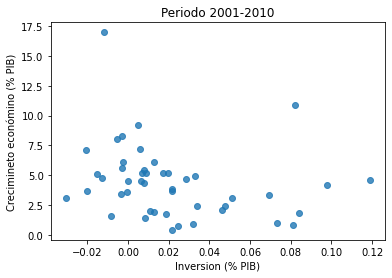

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=df_inversion_vs_economia["inversion_2001_2010"], y=df_inversion_vs_economia["economia_2001_2010"], alpha= 0.8)
ax.set_xlabel('Inversion (% PIB)')
ax.set_ylabel('Crecimineto económino (% PIB)')
ax.set_title('Periodo 2001-2010')


Text(0.5, 1.0, 'Periodo 2011-2020')

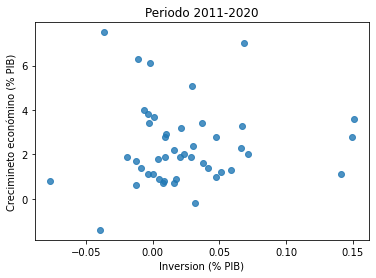

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=df_inversion_vs_economia["inversion_2011_2020"], y=df_inversion_vs_economia["economia_2011_2020"], alpha= 0.8)
ax.set_xlabel('Inversion (% PIB)')
ax.set_ylabel('Crecimineto económino (% PIB)')
ax.set_title('Periodo 2011-2020')

Ciertamente, en los gráficos se puede observar que no hay una gran evidencia de correlación entre ambas variables.

# 6 ) Conclusiones

Considerando las 4 observaciones anteriores, podemos decir que hay indicios de cierta relación entre la inversión en ciencia y tenología, y el desarrollo económico de un país. Sin embargo, el estudio realizado hasta este momento no es del todo concluyente. Un análisis más completo incluiría datos de un mayor número de países, un mayor rango de tiempo y más variables, socioeconómicas y finiacieras, para describir de mejor manera el problema.